#Análise de dados acerca das recentes queimadas no Distrito Federal
Recentemente, os moradores do Distrito Federal têm enfrentado sérios problemas relacionados à poluição do ar devido às queimadas. Esta análise, utilizando dados obtidos através da API da OpenWeather, visa comparar os índices de poluição do ar durante o mesmo período dos anos de 2023 e 2024, para entender melhor o impacto das queimadas e avaliar a gravidade da situação.

#Importando bibliotecas utilizadas na análise

In [1]:
import requests
import time
import json
import pandas as pd
import matplotlib.pyplot as plt

#Obtenção dos dados via API da OpenWeather

In [8]:
# Substitua pela sua chave de API
api_key = "sua_chave_api"

# Latitude e Longitude de Brasília
lat = "-15.7801"
lon = "-47.9292"

# Função para coletar dados de um período específico
def coletar_dados(start_date, end_date, api_key):
    start = int(time.mktime(time.strptime(start_date, "%Y-%m-%d %H:%M:%S")))
    end = int(time.mktime(time.strptime(end_date, "%Y-%m-%d %H:%M:%S")))

    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}"

    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Erro ao fazer requisição: {response.status_code}")

# Coletando dados de 2024
data_2024 = coletar_dados("2024-07-17 00:00:00", "2024-09-17 00:00:00", api_key)

# Coletando dados de 2023
data_2023 = coletar_dados("2023-07-17 00:00:00", "2023-09-17 00:00:00", api_key)

# Função para extrair dados específicos
def extrair_dados(data):
    data_list = []
    for entry in data['list']:
        timestamp = entry['dt']
        date_time = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(timestamp))
        pm2_5 = entry['components']['pm2_5']
        pm10 = entry['components']['pm10']
        co = entry['components']['co']
        no2 = entry['components']['no2']
        aqi = entry['main']['aqi']

        data_list.append({
            'Data': date_time,
            'AQI': aqi,
            'PM2.5': pm2_5,
            'PM10': pm10,
            'CO': co,
            'NO2': no2,
        })
    return pd.DataFrame(data_list)

# Convertendo os dados para DataFrames
df_2024 = extrair_dados(data_2024)
df_2023 = extrair_dados(data_2023)

# Converta a coluna 'Data' para o formato datetime
df_2024['Data'] = pd.to_datetime(df_2024['Data'])
df_2023['Data'] = pd.to_datetime(df_2023['Data'])

#Análise exploratória de dados (EDA)
Esta análise tem como objetivo comparar as métricas de poluição do ar durante um período de 2 meses em 2023 e 2024.

#Primeira comparação: níveis de PM2.5 e PM10 no ar de Brasília
Material Particulado (PM): Inclui partículas de diferentes tamanhos, como PM2.5 (partículas com diâmetro menor que 2,5 micrômetros) e PM10 (partículas com diâmetro menor que 10 micrômetros). Essas partículas podem penetrar profundamente nos pulmões e causar problemas respiratórios e cardiovasculares

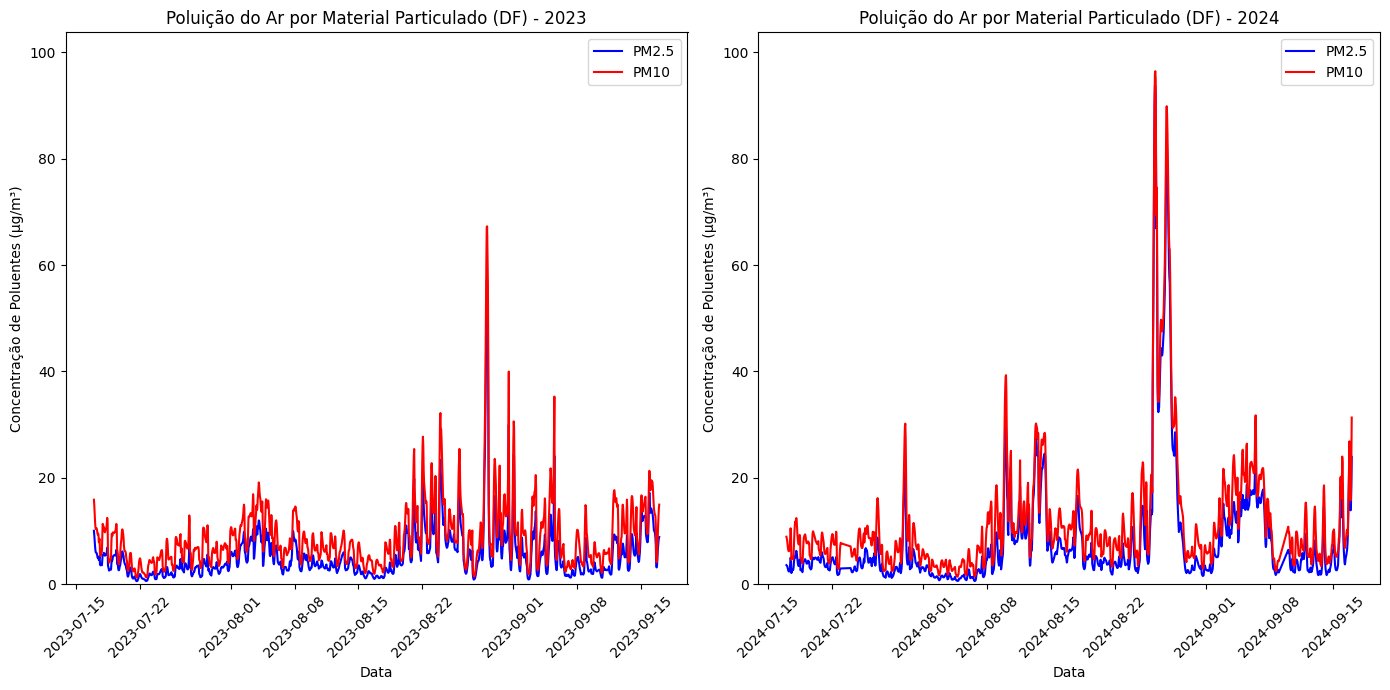

In [3]:
# Converta a coluna 'Data' para o formato datetime para facilitar a manipulação
df_2024['Data'] = pd.to_datetime(df_2024['Data'])
df_2023['Data'] = pd.to_datetime(df_2023['Data'])

# Determinando o intervalo máximo para o eixo y
max_pm25_2024 = df_2024['PM2.5'].max()
max_pm10_2024 = df_2024['PM10'].max()
max_pm25_2023 = df_2023['PM2.5'].max()
max_pm10_2023 = df_2023['PM10'].max()

max_pm25 = max(max_pm25_2024, max_pm25_2023)
max_pm10 = max(max_pm10_2024, max_pm10_2023)

# Definindo o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Primeiro gráfico: Dados do período do ano 2023
plt.subplot(1, 2, 1)
plt.plot(df_2023['Data'], df_2023['PM2.5'], label='PM2.5', linestyle='-', color='blue')
plt.plot(df_2023['Data'], df_2023['PM10'], label='PM10', linestyle='-', color='red')
plt.title('Poluição do Ar por Material Particulado (DF) - 2023')
plt.xlabel('Data')
plt.ylabel('Concentração de Poluentes (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, max_pm25 + 10)  # Ajusta o intervalo do eixo y com o mesmo valor

# Segundo gráfico: Dados do período 2024
plt.subplot(1, 2, 2)
plt.plot(df_2024['Data'], df_2024['PM2.5'], label='PM2.5', linestyle='-', color='blue')
plt.plot(df_2024['Data'], df_2024['PM10'], label='PM10', linestyle='-', color='red')
plt.title('Poluição do Ar por Material Particulado (DF) - 2024')
plt.xlabel('Data')
plt.ylabel('Concentração de Poluentes (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, max_pm25 + 10)  # Ajusta o intervalo do eixo y com um pequeno buffer

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()

# Exibindo os gráficos
plt.show()

#Verificando quantas vezes o ar de Brasília ultrapassou os limites de poluição por PM estabelecidos pela OMS

In [4]:
oms_limits = {
    'PM2.5_daily': 15,  # µg/m³
    'PM10_daily': 45   # µg/m³
}

# Agrupar os dados por dia e calcular a média
daily_avg_2023 = df_2023.resample('D', on='Data').mean()
daily_avg_2024 = df_2024.resample('D', on='Data').mean()

# Contar dias que excedem os limites para 2023
count_2023_pm25 = (daily_avg_2023['PM2.5'] > oms_limits['PM2.5_daily']).sum()
count_2023_pm10 = (daily_avg_2023['PM10'] > oms_limits['PM10_daily']).sum()

# Contar dias que excedem os limites para 2024
count_2024_pm25 = (daily_avg_2024['PM2.5'] > oms_limits['PM2.5_daily']).sum()
count_2024_pm10 = (daily_avg_2024['PM10'] > oms_limits['PM10_daily']).sum()

# Exibir os resultados
print('-'*110)
print(f"2023 - Número de dias que PM2.5 excedeu o limite da OMS: {count_2023_pm25}")
print(f"2023 - Número de dias que PM10 excedeu o limite da OMS: {count_2023_pm10}")
print('-'*110)
print(f"2024 - Número de dias que PM2.5 excedeu o limite da OMS: {count_2024_pm25}")
print(f"2024 - Número de dias que PM10 excedeu o limite da OMS: {count_2024_pm10}")
print('-'*110)
print(f'Em 2024, ocorreu um aumento de {int(count_2024_pm25 / count_2023_pm25 * 100 - 100)}% na quantidade de dias que o limite da OMS para PM2.5 foi ultrapassado')
print('-'*110)


--------------------------------------------------------------------------------------------------------------
2023 - Número de dias que PM2.5 excedeu o limite da OMS: 1
2023 - Número de dias que PM10 excedeu o limite da OMS: 0
--------------------------------------------------------------------------------------------------------------
2024 - Número de dias que PM2.5 excedeu o limite da OMS: 9
2024 - Número de dias que PM10 excedeu o limite da OMS: 2
--------------------------------------------------------------------------------------------------------------
Em 2024, ocorreu um aumento de 800% na quantidade de dias que o limite da OMS para PM2.5 foi ultrapassado
--------------------------------------------------------------------------------------------------------------


#Segunda comparação: níveis de NO2 no ar de Brasília
Dióxido de Nitrogênio (NO₂): gás que resulta principalmente da queima de combustíveis fósseis, como carvão e petróleo, mas também é liberado durante as queimadas. Este gás é um poluente atmosférico que pode causar irritação nas vias respiratórias, aumentar a susceptibilidade a infecções respiratórias e agravar doenças como asma e bronquite. Além disso, o NO₂ contribui para a formação de ozônio troposférico e partículas finas, que têm impactos adicionais na saúde humana e ambiental.

In [5]:
# Tratando outiliers nos dados acerca da concentração de NO2
min_valid_no2 = 0
max_valid_no2 = 300

# Filtrando os dados para remover outliers
df_2024_clean = df_2024[(df_2024['NO2'] >= min_valid_no2) & (df_2024['NO2'] <= max_valid_no2)]
df_2023_clean = df_2023[(df_2023['NO2'] >= min_valid_no2) & (df_2023['NO2'] <= max_valid_no2)]


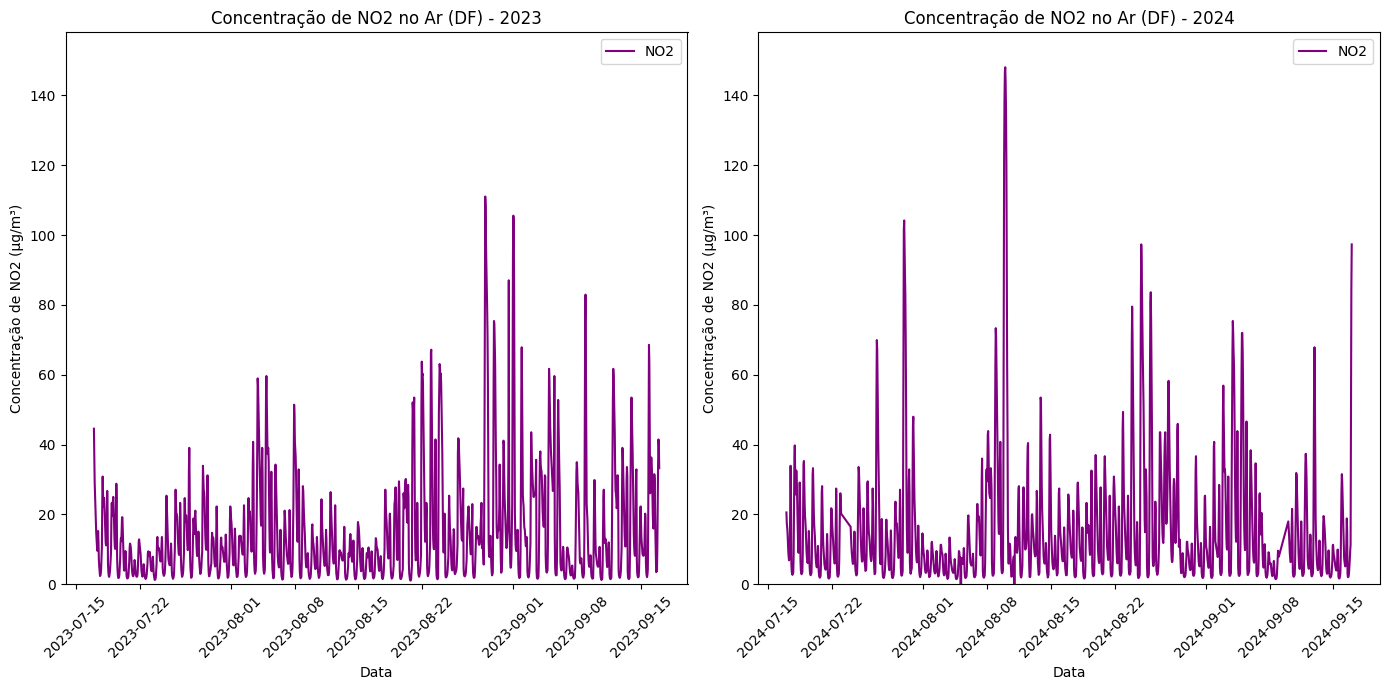

In [6]:
# Determinando o intervalo máximo para o eixo y
max_no2_2024 = df_2024['NO2'].max()
max_no2_2023 = df_2023['NO2'].max()


max_no2 = max(max_no2_2024, max_no2_2023)

# Definindo o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Primeiro gráfico: Dados do período do ano passado para NO2
plt.subplot(1, 2, 1)
plt.plot(df_2023['Data'], df_2023['NO2'], label='NO2', linestyle='-', color='purple')
plt.title('Concentração de NO2 no Ar (DF) - 2023')
plt.xlabel('Data')
plt.ylabel('Concentração de NO2 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, max_no2 + 10)  # Ajusta o intervalo do eixo y com o mesmo valor

# Segundo gráfico: Dados do período atual para NO2
plt.subplot(1, 2, 2)
plt.plot(df_2024['Data'], df_2024['NO2'], label='NO2', linestyle='-', color='purple')
plt.title('Concentração de NO2 no Ar (DF) - 2024')
plt.xlabel('Data')
plt.ylabel('Concentração de NO2 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, max_no2 + 10)  # Ajusta o intervalo do eixo y com um pequeno buffer

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()

# Exibindo os gráficos
plt.show()

#Terceira comparação: níveis de CO no ar de Brasília
Monóxido de Carbono (CO): O Monóxido de Carbono é um gás produzido pela queima incompleta de matéria orgânica, como durante as queimadas. Este gás pode ser perigoso em altas concentrações, causando sintomas como dores de cabeça, tontura e, em casos extremos, envenenamento. A exposição prolongada ao CO pode levar a problemas graves de saúde, incluindo danos ao sistema cardiovascular e neurológico.

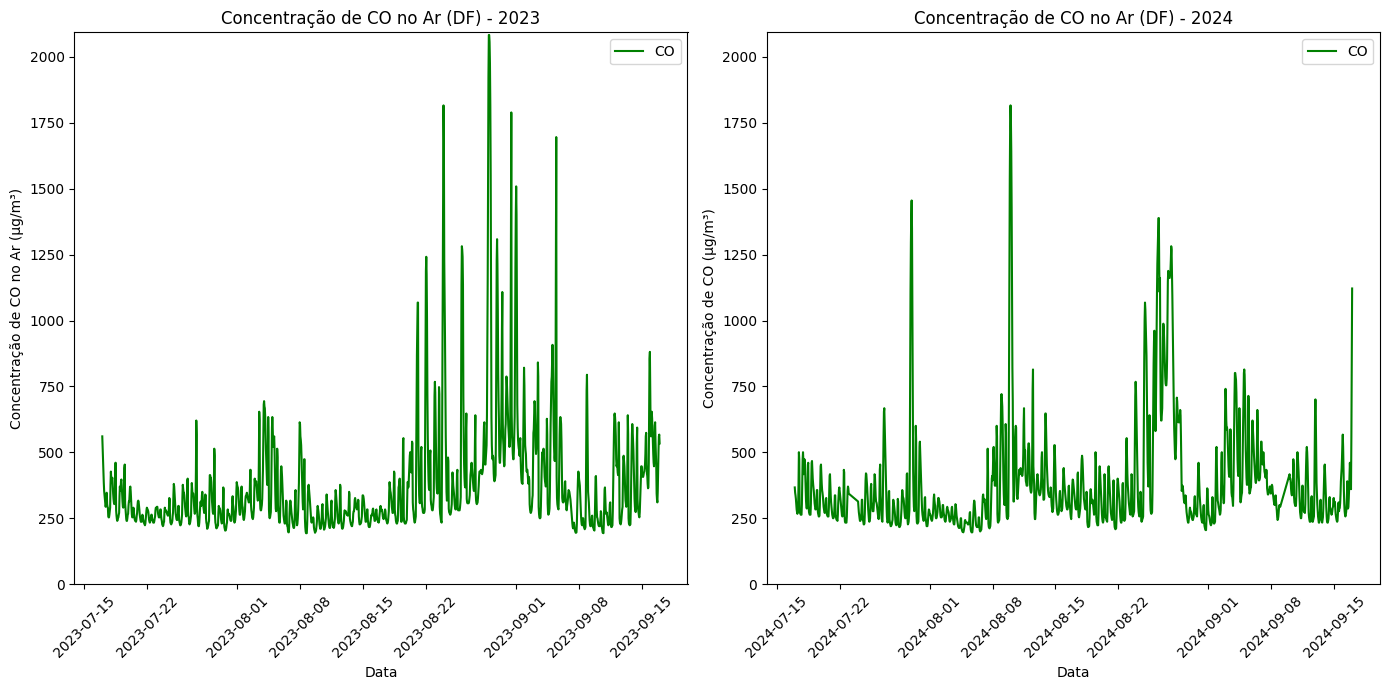

In [7]:
# Determinando o intervalo máximo para o eixo y
max_co_2024 = df_2024['CO'].max()
max_co_2023 = df_2023['CO'].max()


max_co = max(max_co_2024, max_co_2023)

# Definindo o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Primeiro gráfico: Dados do período do ano passado para CO
plt.subplot(1, 2, 1)
plt.plot(df_2023['Data'], df_2023['CO'], label='CO', linestyle='-', color='green')
plt.title('Concentração de CO no Ar (DF) - 2023')
plt.xlabel('Data')
plt.ylabel('Concentração de CO no Ar (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, max_co + 10)  # Ajusta o intervalo do eixo y com o mesmo valor

# Segundo gráfico: Dados do período atual para CO
plt.subplot(1, 2, 2)
plt.plot(df_2024['Data'], df_2024['CO'], label='CO', linestyle='-', color='green')
plt.title('Concentração de CO no Ar (DF) - 2024')
plt.xlabel('Data')
plt.ylabel('Concentração de CO (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, max_co + 10)  # Ajusta o intervalo do eixo y com um pequeno buffer

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()

# Exibindo os gráficos
plt.show()

#Conclusões gerais:
De acordo com a análise, o principal problema gerado pelas queimadas durante esse período de 2024 são as micropartículas carregadas pelo ar. Essas partículas, especialmente PM2.5, têm sido predominantemente elevadas e representam um risco significativo para a saúde pública. O PM2.5, partículas com diâmetro menor que 2,5 micrômetros, pode penetrar profundamente nos pulmões e no sistema cardiovascular, agravando condições respiratórias e aumentando o risco de doenças cardíacas.